# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Omri 8652
# student 2: Yahav 0093

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [54]:
# Pandas Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# M.L Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df_train=pd.read_csv("data/cancer_train.csv")
df_test=pd.read_csv("data/cancer_test.csv")

In [4]:
len(df_train)

455

In [5]:
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [6]:
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         4

In [8]:
df_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


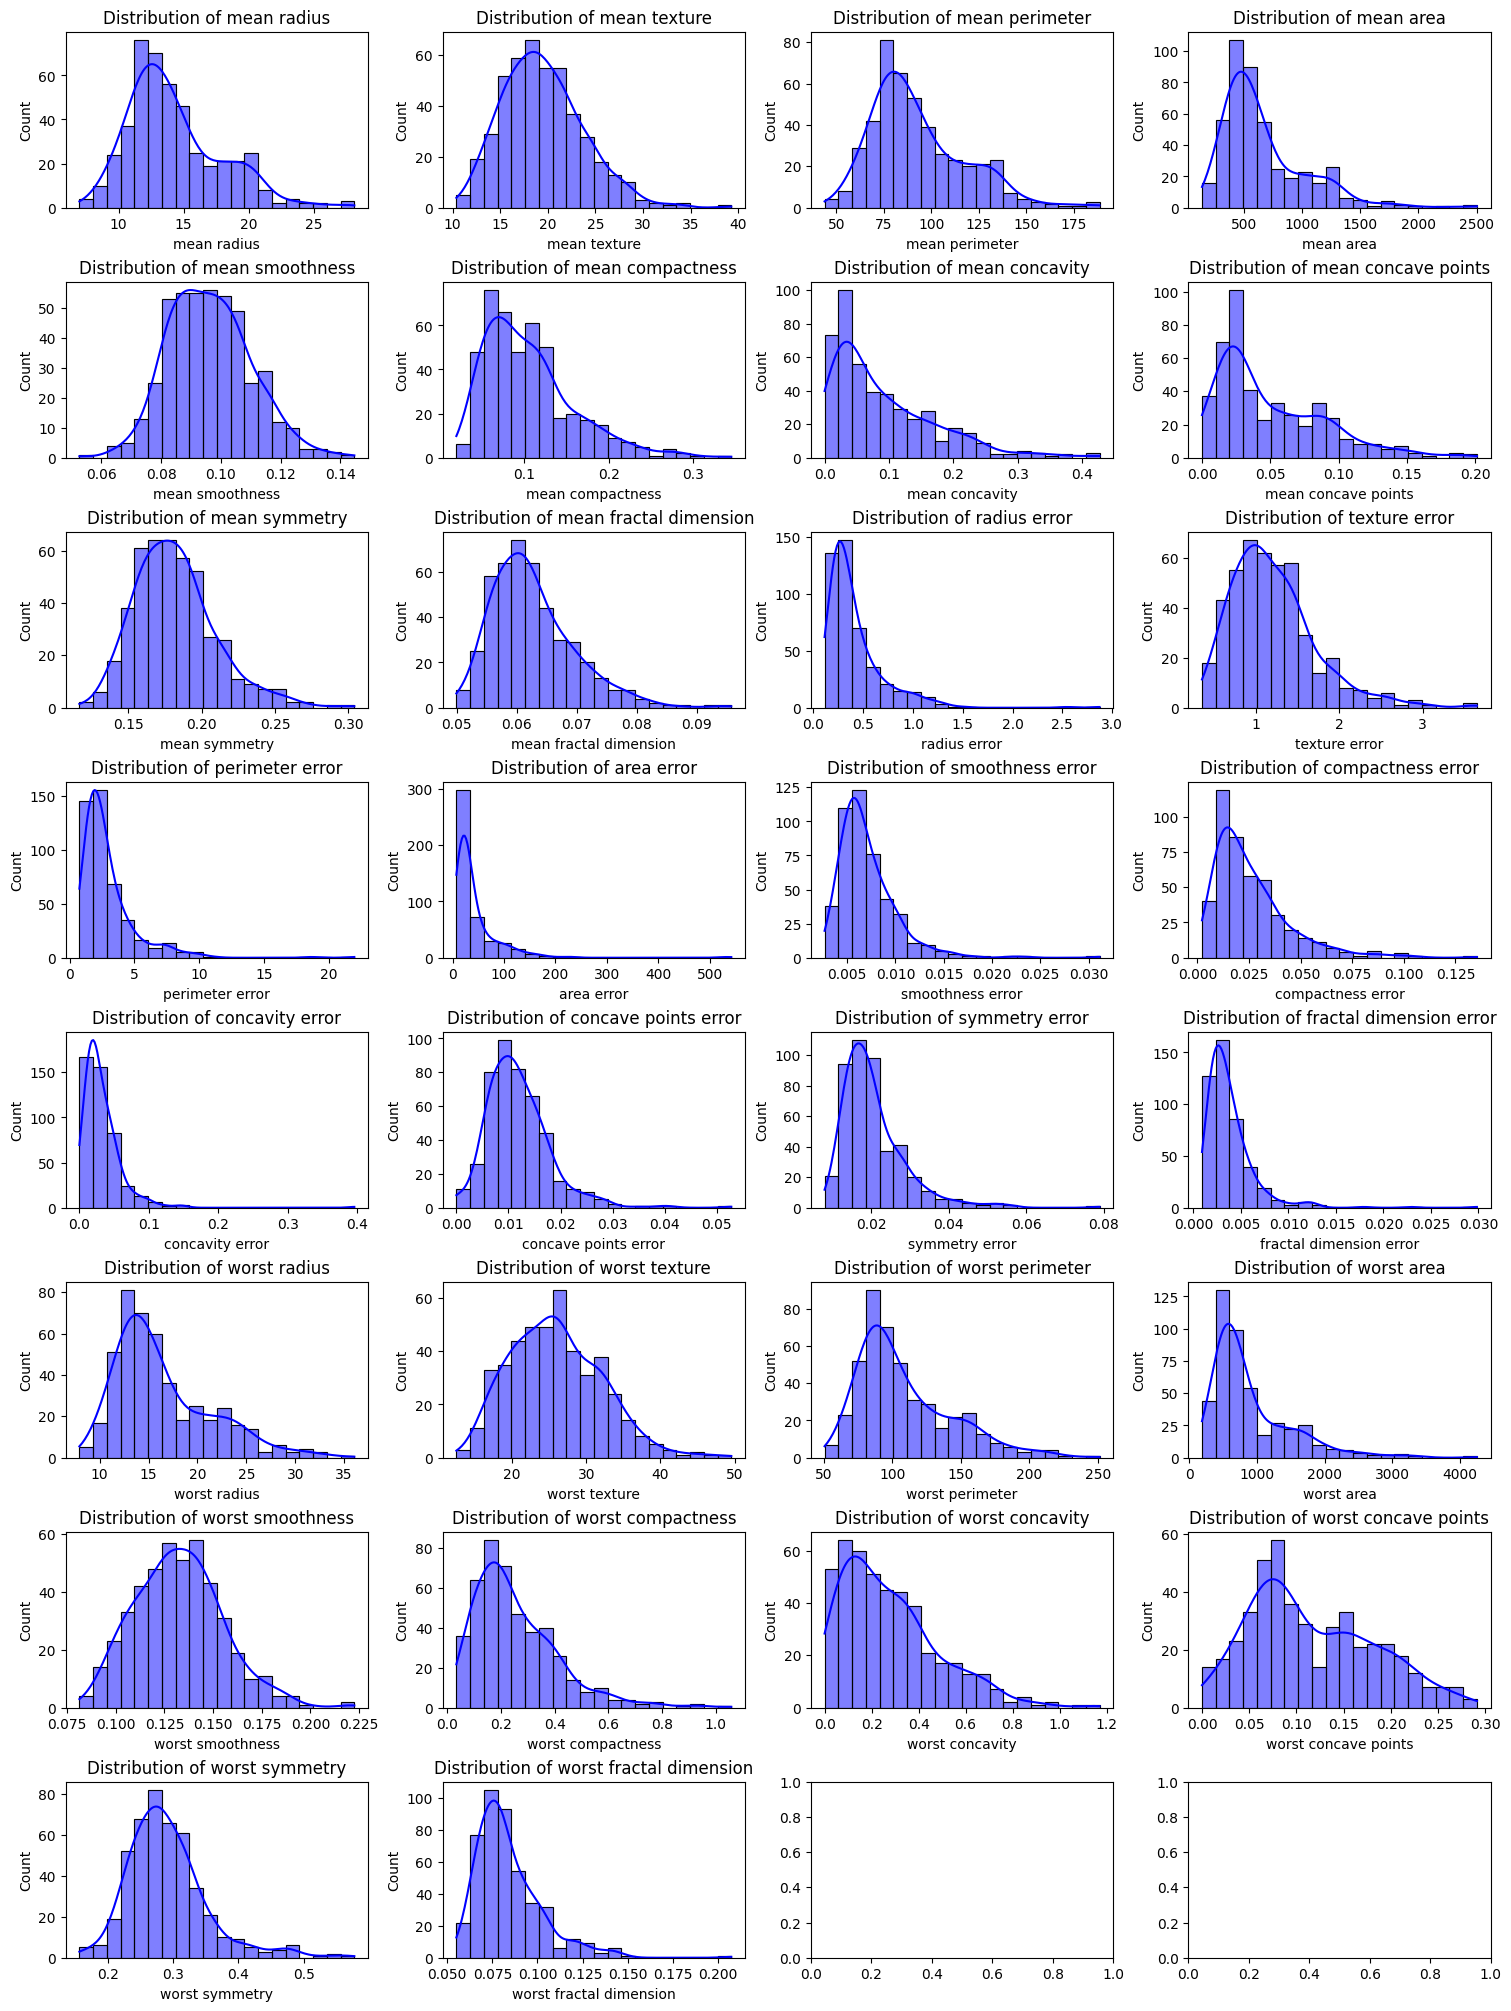

In [9]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train.drop(columns={'target'})):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    sns.histplot(df_train[col], bins=20, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Count')
plt.show()

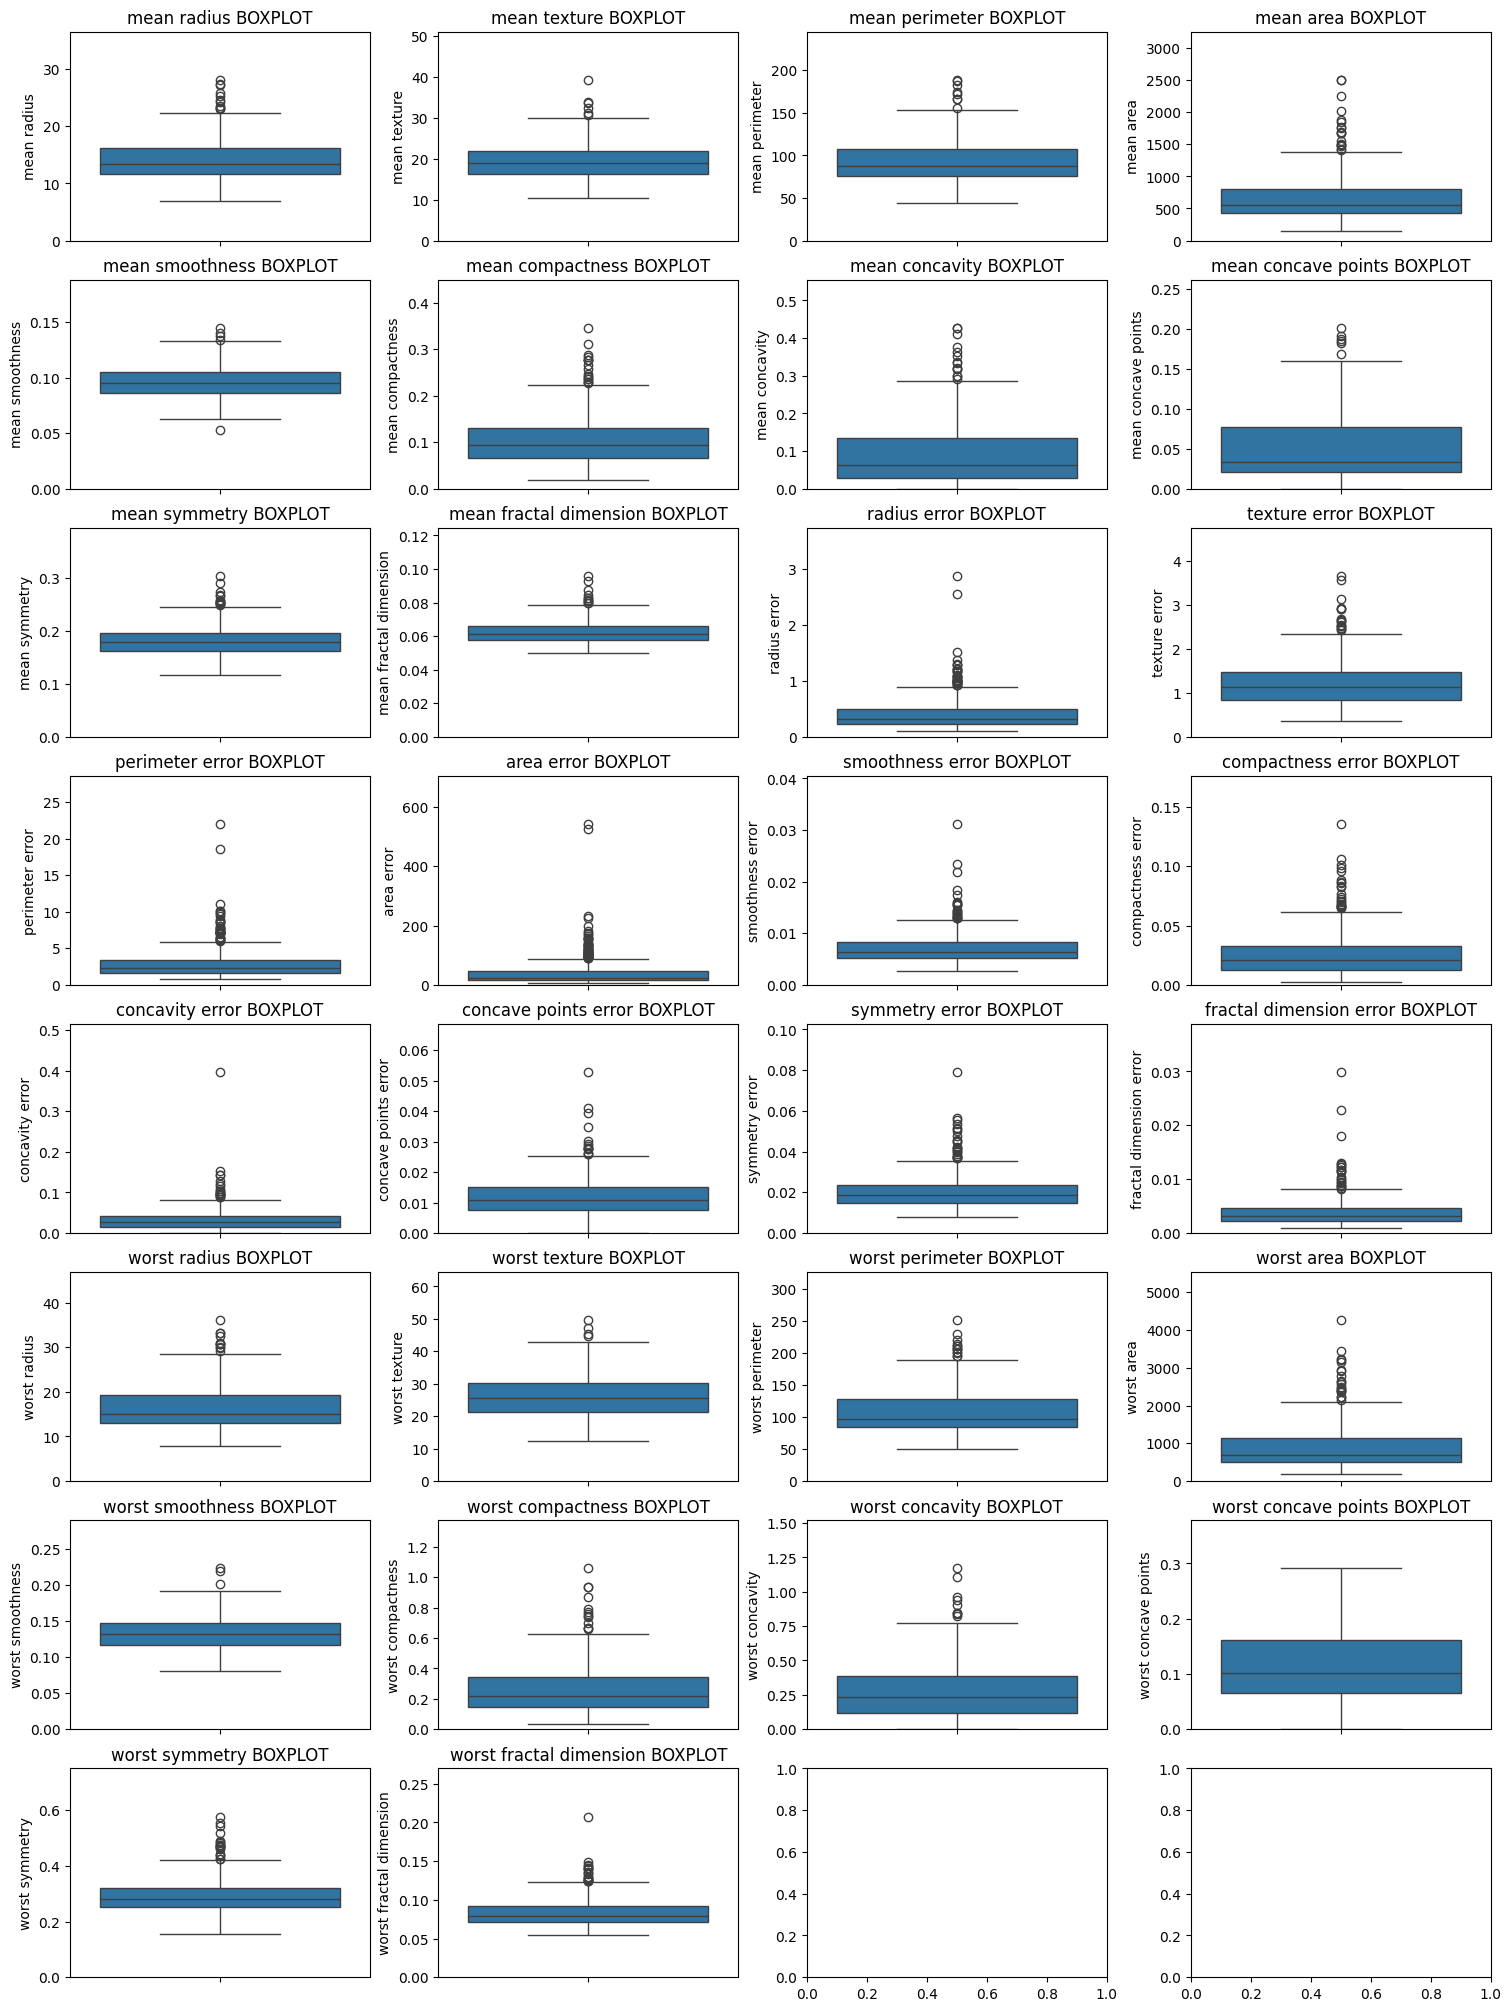

In [10]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train.drop(columns={'target'})):
    row = i // 4  
    col_num = i % 4
    ax = axes[row, col_num]
    
    sns.boxplot(y=df_train[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_train[col].max() * 1.30)

plt.show()

In [11]:

for col in df_train.drop(columns={'target'}).columns:
    upper_bound = df_train[col].mean() + 2.5 * df_train[col].std()
    lower_bound = df_train[col].mean() - 2.5 * df_train[col].std()
    
    df_train = df_train[(df_train[col] <= upper_bound) & (df_train[col] >= lower_bound)]


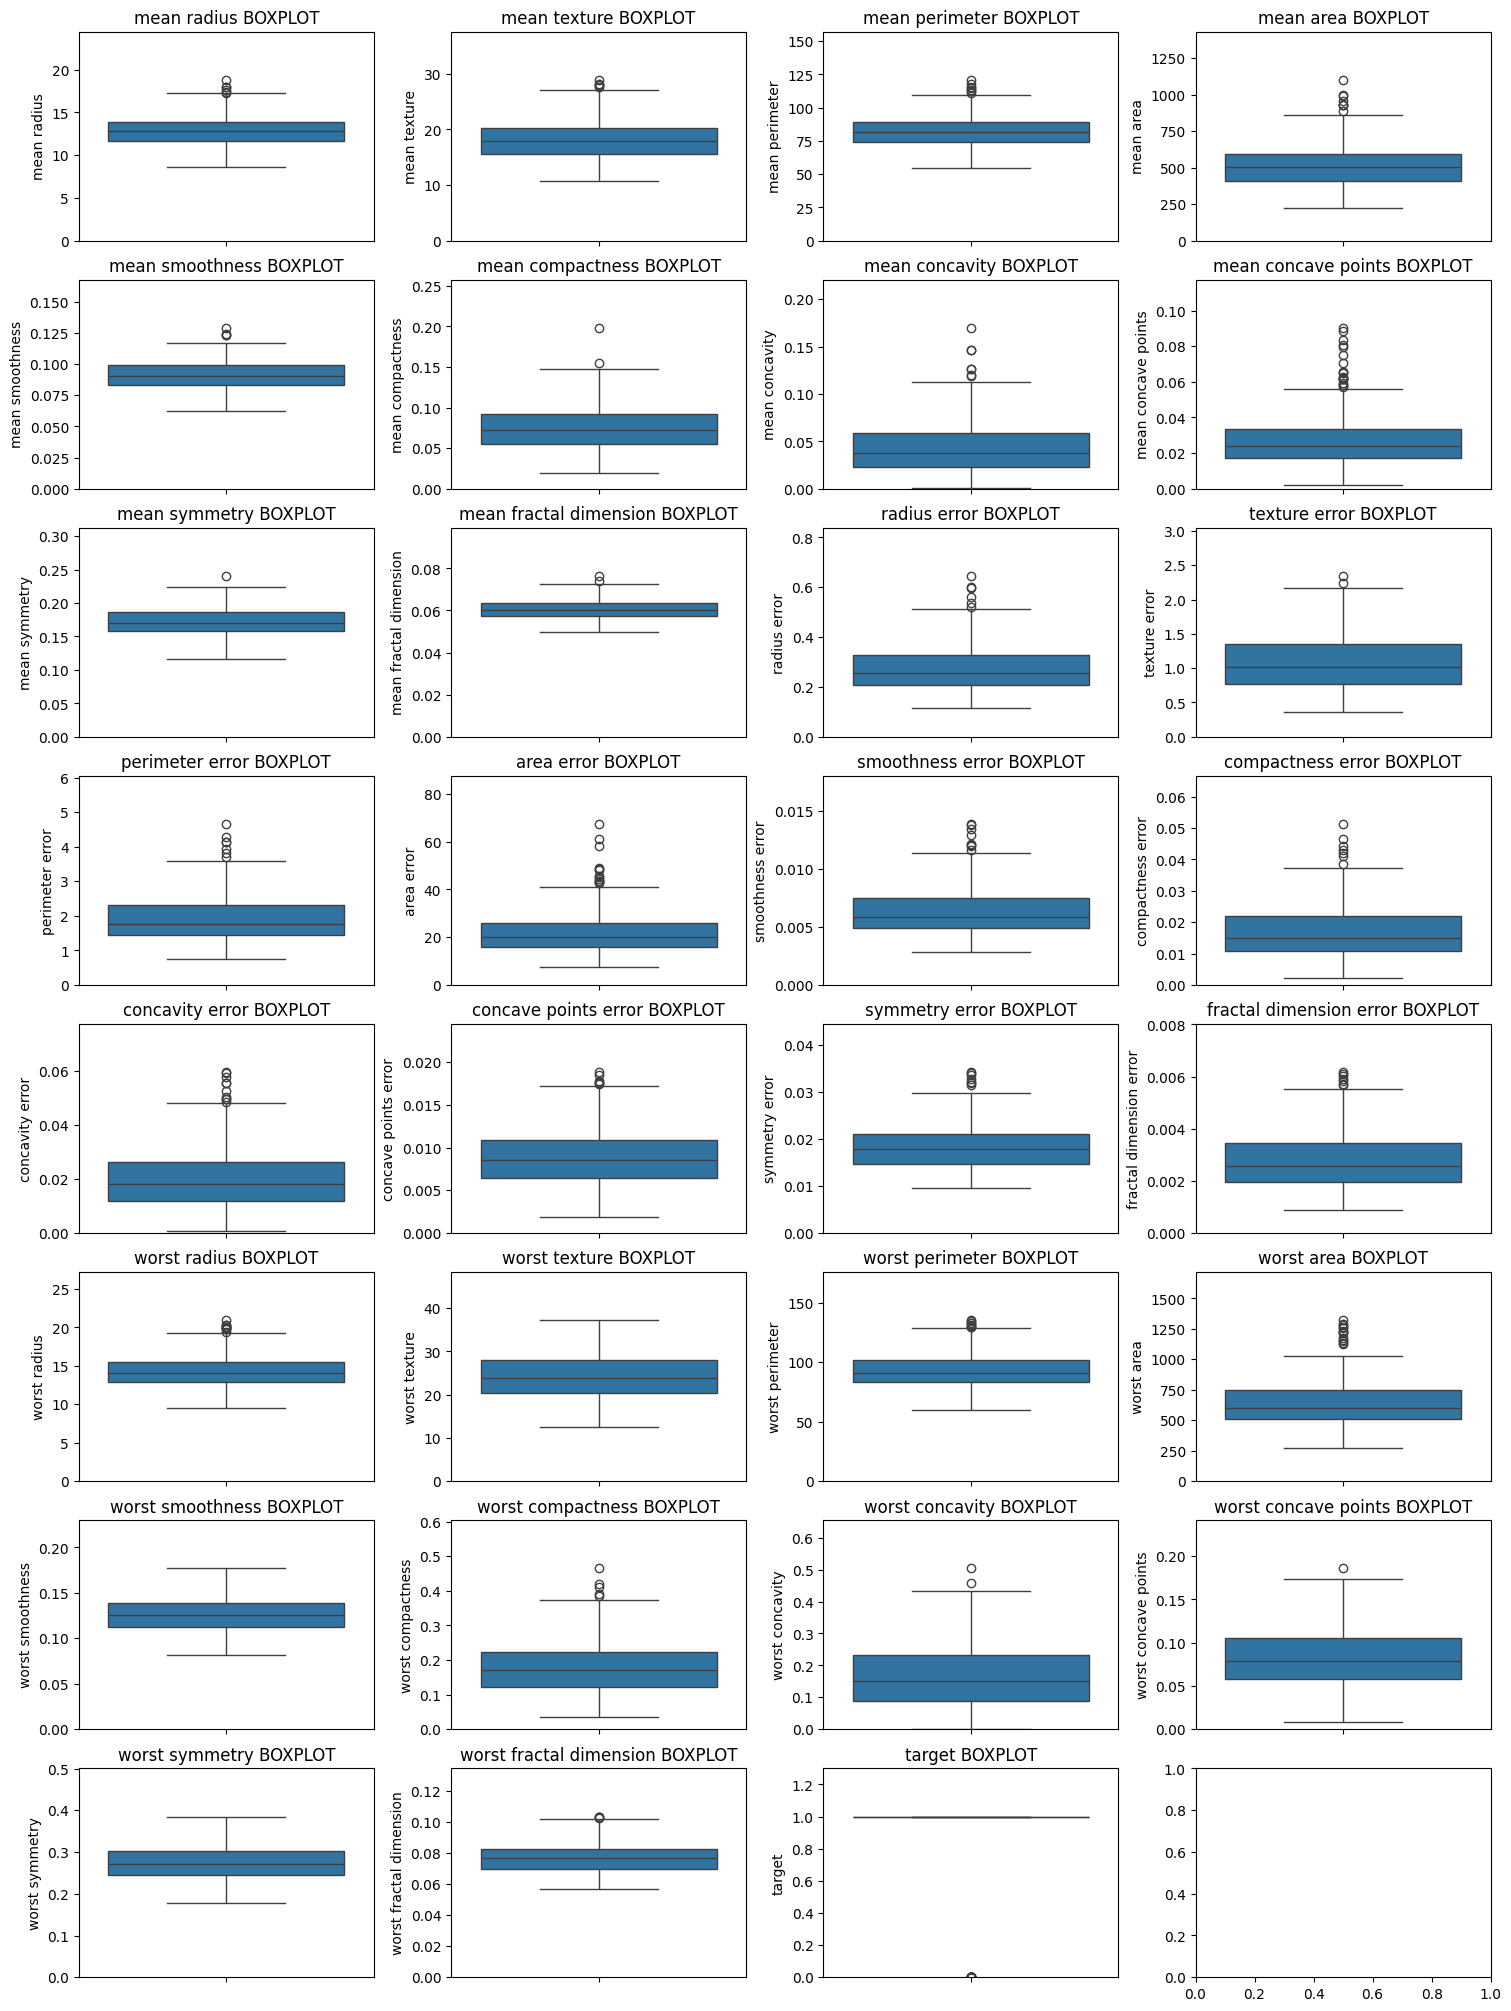

In [12]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train):
    row = i // 4  
    col_num = i % 4
    ax = axes[row, col_num]
    
    sns.boxplot(y=df_train[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_train[col].max() * 1.30)

plt.show()

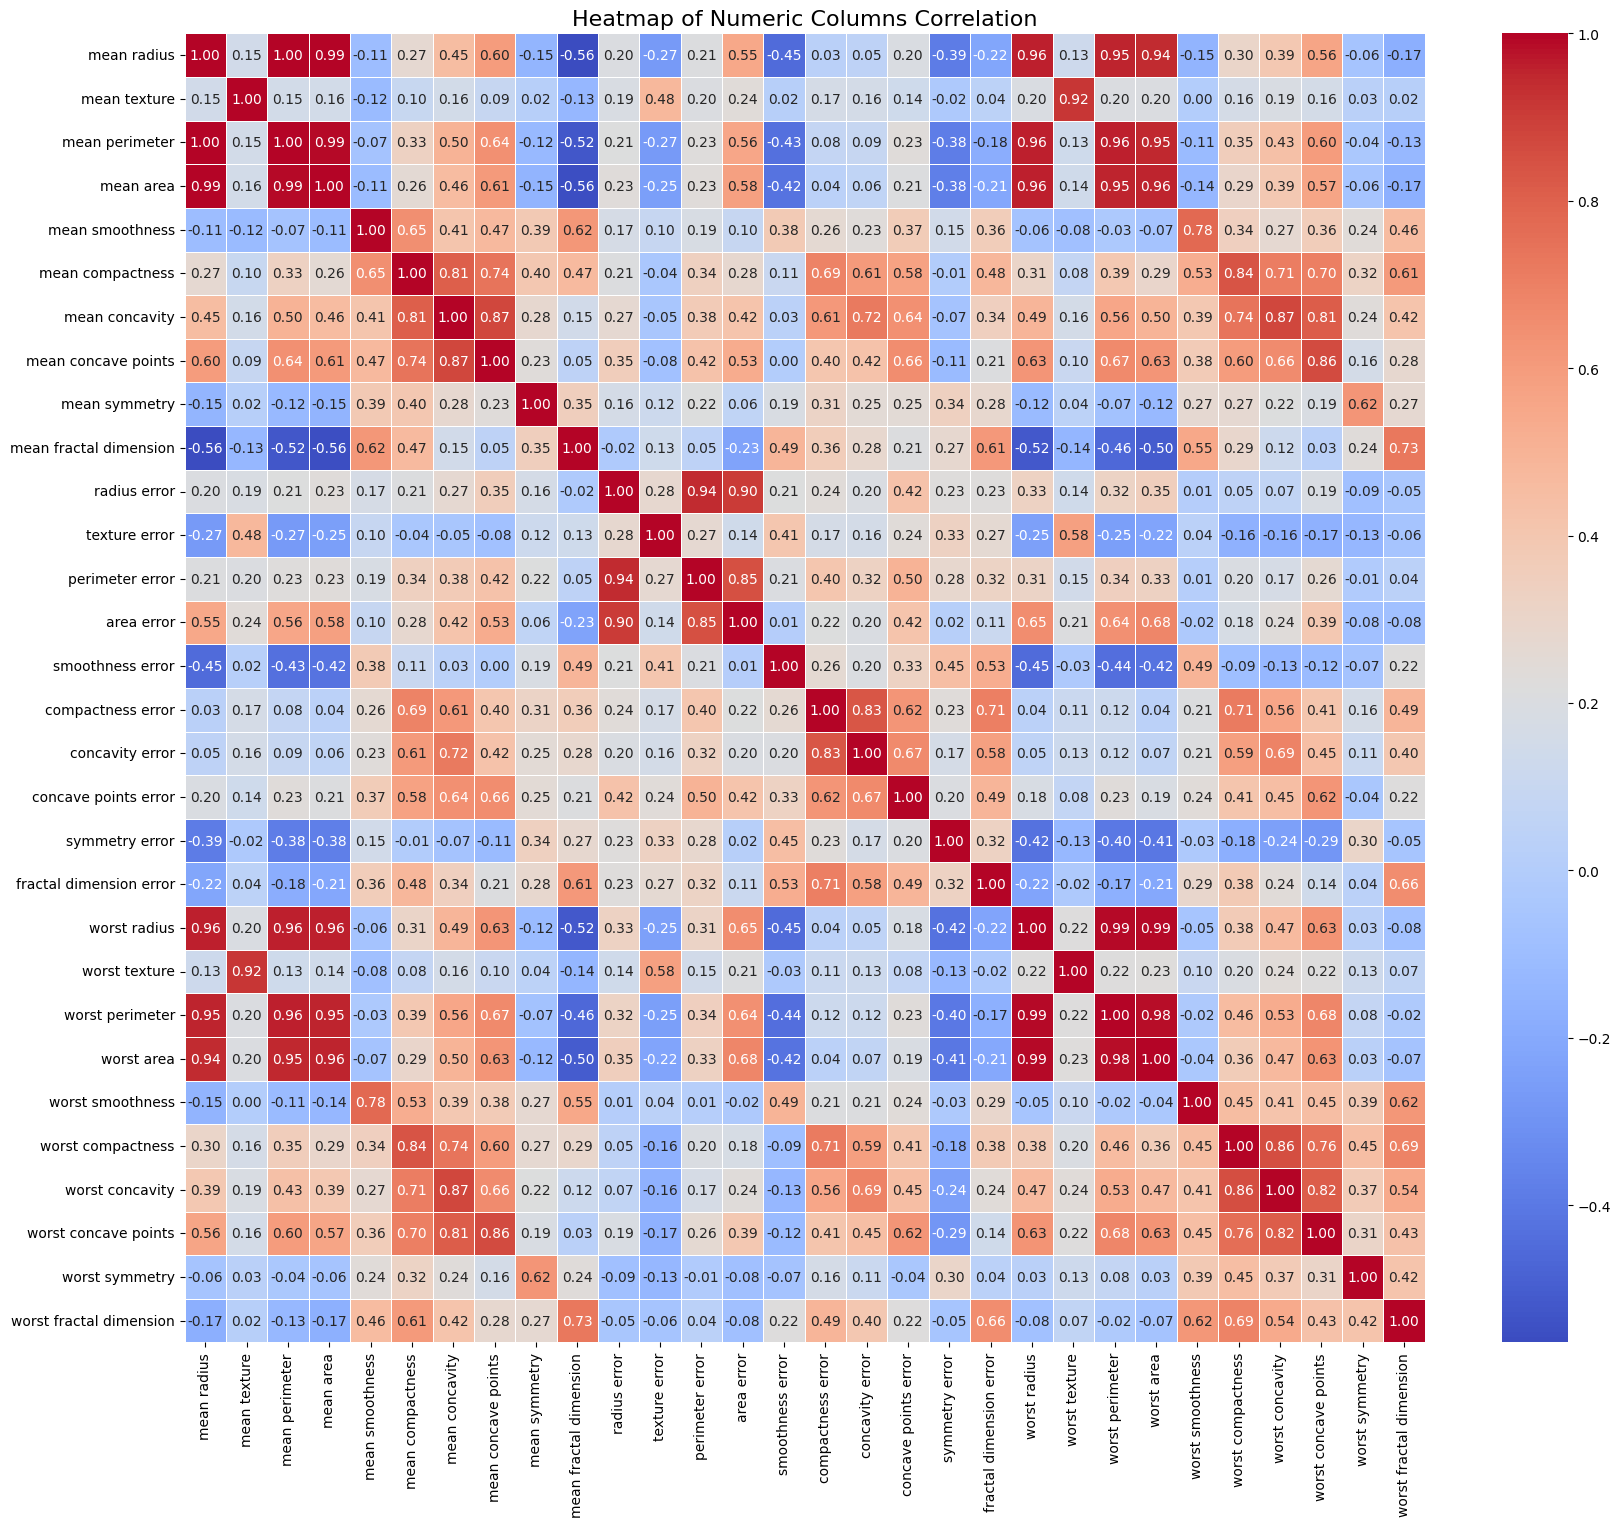

In [13]:
corr_matrix = df_train.drop(columns={'target'}).corr()
plt.figure(figsize=(20, 17))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [89]:
col_to_drop={'target','mean radius','mean perimeter','worst radius'}

y_train=df_train['target']
X_train=df_train.drop(columns=col_to_drop)

y_test=df_test['target']
X_test=df_test.drop(columns=col_to_drop)


In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
param_grids = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],'metric': ['euclidean', 'manhattan', 'minkowski']}


best_param={ 'n_neighbors': 0,'metric':""}
best_score=0
knn_result={'n_neighbors':[],'metric':[],'score':[]}
for n in param_grids['n_neighbors']:
    for dis in param_grids['metric']:
          knn_md=KNeighborsClassifier(n_neighbors=n,metric=dis)
          score=cross_val_score(estimator=knn_md,X=X_train,y=y_train,cv=5,scoring='f1_macro').mean()
          knn_result['n_neighbors'].append(n)
          knn_result['metric'].append(dis)
          knn_result['score'].append(score)
          if(score>best_score):
               best_param['n_neighbors']=n
               best_param['metric']=dis
               best_score=score
df=pd.DataFrame(data=knn_result)
df.sort_values(by='score')
    

,n_neighbors,metric,score
1,1,manhattan,0.823463
26,9,minkowski,0.838572
24,9,euclidean,0.838572
29,10,minkowski,0.841460
27,10,euclidean,0.841460
0,1,euclidean,0.841737
2,1,minkowski,0.841737
25,9,manhattan,0.850276
19,7,manhattan,0.850276
20,7,minkowski,0.859956


In [92]:
param_grid_decisionTree = {
    'max_depth': [None, 10, 20, 30, 40, 50],          # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4, 10],                # Minimum number of samples required at a leaf node
}


best_param_decisionTree={ 'max_depth': 0,'min_samples_leaf':0}
best_score=0
decisionTree_result={'max_depth':[],'min_samples_leaf':[],'score':[]}
for md in param_grid_decisionTree['max_depth']:
    for msl in param_grid_decisionTree['min_samples_leaf']:
          decisionTree_md=DecisionTreeClassifier(max_depth=md,min_samples_leaf=msl)
          score=cross_val_score(estimator=decisionTree_md,X=X_train,y=y_train,cv=5,scoring='f1_macro').mean()
          decisionTree_result['max_depth'].append(md)
          decisionTree_result['min_samples_leaf'].append(msl)
          decisionTree_result['score'].append(score)
          if(score>best_score):
               best_param_decisionTree['max_depth']=md
               best_param_decisionTree['min_samples_leaf']=msl
               best_score=score

df=pd.DataFrame(data=decisionTree_result)
df.sort_values(by='score')  

,max_depth,min_samples_leaf,score
20,50.0,1,0.761296
12,30.0,1,0.765114
11,20.0,10,0.770339
19,40.0,10,0.770339
7,10.0,10,0.770339
23,50.0,10,0.770339
3,NaN,10,0.770339
22,50.0,4,0.774626
1,NaN,2,0.775940
13,30.0,2,0.777419


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [101]:
best_knn_model=KNeighborsClassifier(n_neighbors=8,metric='manhattan')


In [102]:
best_knn_model.fit(X=X_train,y=y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

## Part 5 - Apply on test and show model performance estimation

In [103]:
y_pred=best_knn_model.predict(X_test)
f1=f1_score(y_test,y_pred,average='macro')
f1

0.978675645342312

In [104]:
predictVSactual=pd.DataFrame(data={'predict':y_pred,'actual':y_test})

In [105]:
predictVSactual.head()

,predict,actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [111]:
tp = np.sum((y_pred == 1) & (y_test == 1))  
tn = np.sum((y_pred == 0) & (y_test == 0))
fp = np.sum((y_pred == 1) & (y_test == 0))
fn = np.sum((y_pred == 0) & (y_test == 1))

In [112]:
knn_model_accurancy=(tp+tn)/len(y_test)
knn_model_precision=tp/(tp+fp)
knn_model_recall=tp/(tp+fn)
knn_model_error_rate=1-knn_model_accurancy

In [114]:
results=pd.DataFrame(data={'accurancy':knn_model_accurancy,'precision':knn_model_precision,'recall':knn_model_recall,'error_rate':knn_model_error_rate},index=[1])

In [115]:
results

,accurancy,precision,recall,error_rate
1,0.982456,0.97561,1.0,0.017544
